In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

In [80]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


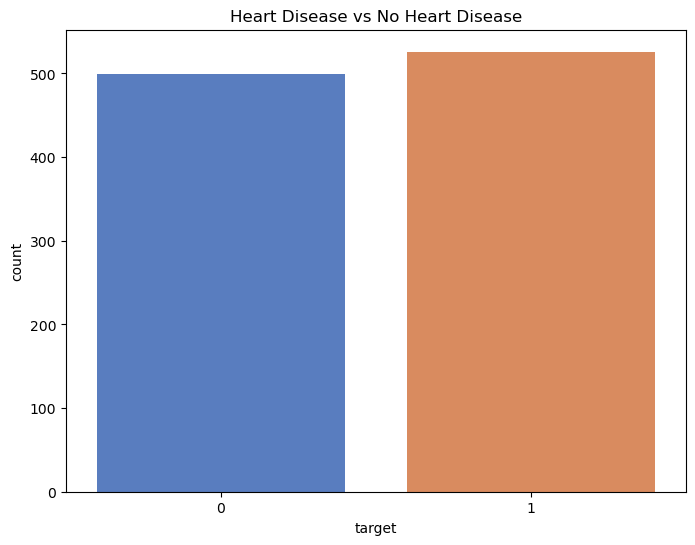

In [84]:
target_mapping = {'1': 'Heart Disease', '0': 'No Heart Disease'}
df['target'] = df['target'].replace(target_mapping)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.title('Heart Disease vs No Heart Disease')
plt.show()

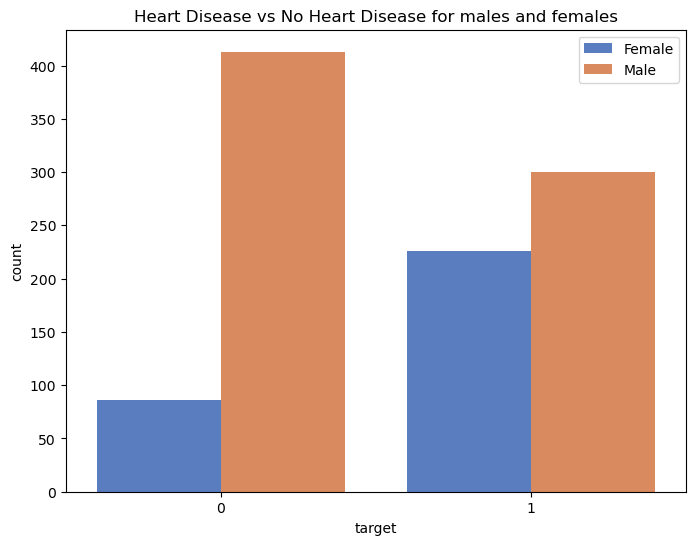

In [85]:
sns.set_palette('muted')
target_mapping = {'1': 'Heart Disease', '0': 'No Heart Disease'}
df['target'] = df['target'].replace(target_mapping)
gender_mapping = {'1': 'Male', '0': 'Female'}
df['sex'] = df['sex'].replace(gender_mapping)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target', hue='sex')
plt.title('Heart Disease vs No Heart Disease for males and females')
plt.legend(['Female','Male'])
plt.show()


In [90]:
import pandas as pd

# Load your dataset into a pandas DataFrame
df = pd.read_csv('heart.csv')

# Drop rows with null values in a specific column
column_name = 'thal'
value_to_drop = 0
df = df[df[column_name] != value_to_drop]

# Verify the changes
df.head()

count = len(df[df[column_name] == 0])

# Print the count
print("Number of rows with value 0:", count)

Number of rows with value 0: 0


In [91]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your dataset into a pandas DataFrame
df = pd.read_csv('heart.csv')

# Select the columns you want to scale
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'cp','thal','restecg']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaling to the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Verify the changes
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0.0,0.292453,0.196347,0,0.5,0.740458,0,0.161290,1.0,0.50,1.000000,0
1,0.500000,1,0.0,0.433962,0.175799,1,0.0,0.641221,1,0.500000,0.0,0.00,1.000000,0
2,0.854167,1,0.0,0.481132,0.109589,0,0.5,0.412214,1,0.419355,0.0,0.00,1.000000,0
3,0.666667,1,0.0,0.509434,0.175799,0,0.5,0.687023,0,0.000000,1.0,0.25,1.000000,0
4,0.687500,0,0.0,0.415094,0.383562,1,0.5,0.267176,0,0.306452,0.5,0.75,0.666667,0


In [92]:
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from keras.utils.np_utils import to_categorical
from keras.regularizers import l2
from sklearn.model_selection import train_test_split

X = np.array(df.drop('target', axis=1))
y = np.array(df['target'])



X = X.astype(float) #convert x datatype to float, we may have fractions
y = y.astype(int) #convert y to int as we have class labels

#stratify=y    y is maintained across the training and testing datasets 
#This is particularly useful when dealing with imbalanced datasets where the classes have unequal representation.
#لانه توزيع ال0 و ال1 للاوتبوت مش متكافئة او مش بنفس العدد
# random_state it is often used to control the randomness in data splitting, initialization of model parameters,
# convert integer-encoded categorical labels into one-hot encoded vectors. One-hot encoding is a binary representation 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=42, test_size=0.1)

#we can delete this part as our problem is binary classification
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)


# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=13, activation='relu',kernel_regularizer=l2(0.01)))
    model.add(Dense(16,  activation='relu',kernel_regularizer=l2(0.01)))
    model.add(Dense(8,  activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(2, activation='sigmoid'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())


# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150)

# Get the training loss and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']



test_loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", accuracy)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 32)                448       
                                                                 
 dense_49 (Dense)            (None, 16)                528       
                                                                 
 dense_50 (Dense)            (None, 8)                 136       
                                                                 
 dropout_12 (Dropout)        (None, 8)                 0         
                                                                 
 dense_51 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1,130
Trainable params: 1,130
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150


C:\Users\subeh\anaconda3\envs\tf-new\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


26/26 [==============================] - 1s 13ms/step - loss: 1.0621 - accuracy: 0.5247 - val_loss: 1.0084 - val_accuracy: 0.6022
Epoch 2/150
26/26 [==============================] - 0s 4ms/step - loss: 0.9683 - accuracy: 0.6671 - val_loss: 0.9216 - val_accuracy: 0.8172
Epoch 3/150
26/26 [==============================] - 0s 4ms/step - loss: 0.8862 - accuracy: 0.7250 - val_loss: 0.8339 - val_accuracy: 0.7849
Epoch 4/150
26/26 [==============================] - 0s 3ms/step - loss: 0.8128 - accuracy: 0.7358 - val_loss: 0.7416 - val_accuracy: 0.8172
Epoch 5/150
26/26 [==============================] - 0s 5ms/step - loss: 0.7378 - accuracy: 0.7768 - val_loss: 0.6624 - val_accuracy: 0.8172
Epoch 6/150
26/26 [==============================] - 0s 5ms/step - loss: 0.6968 - accuracy: 0.7600 - val_loss: 0.6115 - val_accuracy: 0.8280
Epoch 7/150
26/26 [==============================] - 0s 5ms/step - loss: 0.6606 - accuracy: 0.7925 - val_loss: 0.5764 - val_accuracy: 0.8065
Epoch 8/150
26/26 [=====

Epoch 59/150
26/26 [==============================] - 0s 4ms/step - loss: 0.4001 - accuracy: 0.8733 - val_loss: 0.3380 - val_accuracy: 0.8817
Epoch 60/150
26/26 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8589 - val_loss: 0.3415 - val_accuracy: 0.9032
Epoch 61/150
26/26 [==============================] - 0s 5ms/step - loss: 0.3911 - accuracy: 0.8770 - val_loss: 0.3362 - val_accuracy: 0.8925
Epoch 62/150
26/26 [==============================] - 0s 4ms/step - loss: 0.4004 - accuracy: 0.8697 - val_loss: 0.3342 - val_accuracy: 0.8817
Epoch 63/150
26/26 [==============================] - 0s 3ms/step - loss: 0.3993 - accuracy: 0.8709 - val_loss: 0.3343 - val_accuracy: 0.8817
Epoch 64/150
26/26 [==============================] - 0s 4ms/step - loss: 0.3893 - accuracy: 0.8709 - val_loss: 0.3359 - val_accuracy: 0.8817
Epoch 65/150
26/26 [==============================] - 0s 3ms/step - loss: 0.3860 - accuracy: 0.8601 - val_loss: 0.3443 - val_accuracy: 0.8925
Epoch 

26/26 [==============================] - 0s 4ms/step - loss: 0.3405 - accuracy: 0.8818 - val_loss: 0.3072 - val_accuracy: 0.8925
Epoch 117/150
26/26 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.8926 - val_loss: 0.3105 - val_accuracy: 0.8710
Epoch 118/150
26/26 [==============================] - 0s 3ms/step - loss: 0.3421 - accuracy: 0.8914 - val_loss: 0.3254 - val_accuracy: 0.8925
Epoch 119/150
26/26 [==============================] - 0s 3ms/step - loss: 0.3292 - accuracy: 0.8951 - val_loss: 0.3105 - val_accuracy: 0.8925
Epoch 120/150
26/26 [==============================] - 0s 4ms/step - loss: 0.3365 - accuracy: 0.8782 - val_loss: 0.3087 - val_accuracy: 0.8817
Epoch 121/150
26/26 [==============================] - 0s 4ms/step - loss: 0.3459 - accuracy: 0.8854 - val_loss: 0.3070 - val_accuracy: 0.8817
Epoch 122/150
26/26 [==============================] - 0s 4ms/step - loss: 0.3228 - accuracy: 0.8914 - val_loss: 0.3033 - val_accuracy: 0.8817
Epoch 123/150

In [88]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


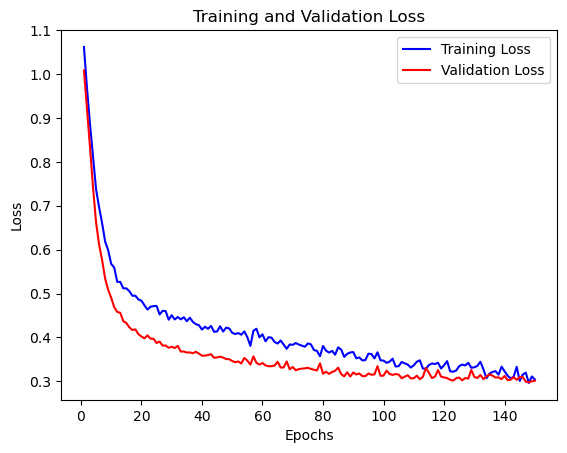

In [93]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation losses
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [62]:
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from keras.utils.np_utils import to_categorical
from keras.regularizers import l2
from sklearn.model_selection import train_test_split

X = np.array(df.drop('target', axis=1))
y = np.array(df['target'])



X = X.astype(float) #convert x datatype to float, we may have fractions
y = y.astype(int) #convert y to int as we have class labels

#stratify=y    y is maintained across the training and testing datasets 
#This is particularly useful when dealing with imbalanced datasets where the classes have unequal representation.
#لانه توزيع ال0 و ال1 للاوتبوت مش متكافئة او مش بنفس العدد
# random_state it is often used to control the randomness in data splitting, initialization of model parameters,
# convert integer-encoded categorical labels into one-hot encoded vectors. One-hot encoding is a binary representation 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=42, test_size=0.1)

#we can delete this part as our problem is binary classification
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)


# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=13, activation='relu',kernel_regularizer=l2(0.01)))
    model.add(Dense(16,  activation='relu',kernel_regularizer=l2(0.01)))
    model.add(Dense(8,  activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(2, activation='sigmoid'))
    
    # compile model
    adam = Adam(lr=0.01)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())


# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200)

# Get the training loss and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']



test_loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", accuracy)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 32)                448       
                                                                 
 dense_41 (Dense)            (None, 16)                528       
                                                                 
 dense_42 (Dense)            (None, 8)                 136       
                                                                 
 dropout_10 (Dropout)        (None, 8)                 0         
                                                                 
 dense_43 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1,130
Trainable params: 1,130
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200


C:\Users\subeh\anaconda3\envs\tf-new\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


26/26 [==============================] - 1s 13ms/step - loss: 1.0249 - accuracy: 0.6273 - val_loss: 0.9634 - val_accuracy: 0.8172
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 0.9475 - accuracy: 0.6743 - val_loss: 0.8763 - val_accuracy: 0.7849
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.8791 - accuracy: 0.7069 - val_loss: 0.7955 - val_accuracy: 0.8172
Epoch 4/200
26/26 [==============================] - 0s 3ms/step - loss: 0.8039 - accuracy: 0.7431 - val_loss: 0.7217 - val_accuracy: 0.8280
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.7553 - accuracy: 0.7382 - val_loss: 0.6579 - val_accuracy: 0.8280
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 0.7052 - accuracy: 0.7600 - val_loss: 0.6039 - val_accuracy: 0.8495
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.7624 - val_loss: 0.5673 - val_accuracy: 0.8710
Epoch 8/200
26/26 [=====

Epoch 59/200
26/26 [==============================] - 0s 3ms/step - loss: 0.4176 - accuracy: 0.8637 - val_loss: 0.3493 - val_accuracy: 0.8925
Epoch 60/200
26/26 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.8528 - val_loss: 0.3509 - val_accuracy: 0.8710
Epoch 61/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4049 - accuracy: 0.8721 - val_loss: 0.3558 - val_accuracy: 0.8817
Epoch 62/200
26/26 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.8733 - val_loss: 0.3438 - val_accuracy: 0.8817
Epoch 63/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4164 - accuracy: 0.8613 - val_loss: 0.3446 - val_accuracy: 0.8817
Epoch 64/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4108 - accuracy: 0.8625 - val_loss: 0.3383 - val_accuracy: 0.8925
Epoch 65/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3948 - accuracy: 0.8806 - val_loss: 0.3439 - val_accuracy: 0.8817
Epoch 

26/26 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.8951 - val_loss: 0.3108 - val_accuracy: 0.9032
Epoch 117/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3330 - accuracy: 0.9095 - val_loss: 0.3076 - val_accuracy: 0.9032
Epoch 118/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3186 - accuracy: 0.8902 - val_loss: 0.3066 - val_accuracy: 0.8817
Epoch 119/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3359 - accuracy: 0.8987 - val_loss: 0.3121 - val_accuracy: 0.9140
Epoch 120/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.9047 - val_loss: 0.3123 - val_accuracy: 0.8925
Epoch 121/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3335 - accuracy: 0.8902 - val_loss: 0.2992 - val_accuracy: 0.8925
Epoch 122/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3302 - accuracy: 0.9023 - val_loss: 0.3052 - val_accuracy: 0.9032
Epoch 123/200

26/26 [==============================] - 0s 4ms/step - loss: 0.2907 - accuracy: 0.9131 - val_loss: 0.2363 - val_accuracy: 0.9247
Epoch 174/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2744 - accuracy: 0.9204 - val_loss: 0.2324 - val_accuracy: 0.9140
Epoch 175/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2915 - accuracy: 0.9131 - val_loss: 0.2285 - val_accuracy: 0.9247
Epoch 176/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2876 - accuracy: 0.9156 - val_loss: 0.2267 - val_accuracy: 0.9032
Epoch 177/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2932 - accuracy: 0.8987 - val_loss: 0.2242 - val_accuracy: 0.9247
Epoch 178/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2880 - accuracy: 0.9131 - val_loss: 0.2321 - val_accuracy: 0.9247
Epoch 179/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2888 - accuracy: 0.9156 - val_loss: 0.2416 - val_accuracy: 0.9140
Epoch 180/200

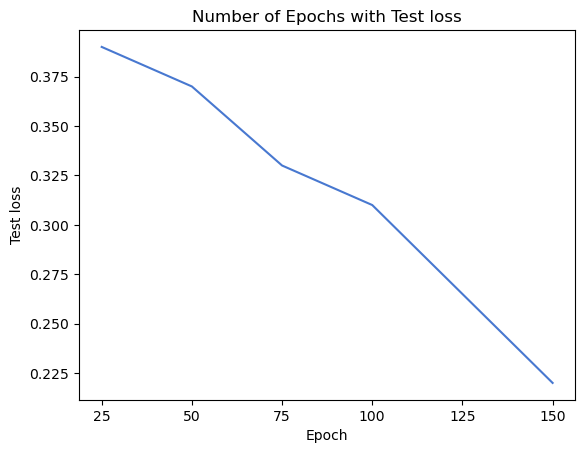

In [107]:
import matplotlib.pyplot as plt

layersbeforeoutlayer = [25,50, 75, 100, 150]
acc = [0.39, 0.37, 0.33, 0.31, 0.22]

plt.plot(layersbeforeoutlayer, acc)
plt.xlabel('Epoch')
plt.ylabel('Test loss')
plt.title('Number of Epochs with Test loss')

# Set the x-axis ticks at intervals of 100
plt.xticks(range(25, 175, 25))

plt.show()

In [100]:
# Assuming you have already defined and fitted the scaler on the training data
# scaler = MinMaxScaler()
# X_train_normalized = scaler.fit_transform(X_train)

# Normalize the new data using the same scaler
new_data = np.array([[58, 0, 103, 248,  0, 122,  1, 1, 0, 2]])
new_data_normalized = scaler.transform(new_data)

print(new_data_normalized)



[[ 6.04166667e-01 -8.86792453e-01 -5.25114155e-02  1.35114504e+00
   0.00000000e+00  6.10000000e+01  2.50000000e-01  3.33333333e-01
   0.00000000e+00  1.00000000e+00]]


C:\Users\subeh\anaconda3\envs\tf-new\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [101]:
print("prediction for new patient", np.argmax(model.predict(np.array(
[[ 6.04166667e-01,0, -8.86792453e-01, -5.25114155e-02,  1.35114504e+00,0,
   0.00000000e+00  ,6.10000000e+01 , 2.50000000e-01 ,0, 3.33333333e-01,
   0.00000000e+00 , 1.00000000e+00]])),axis=1))

1/1 [==============================] - 0s 27ms/step
prediction for new patient [1]
